In [311]:
import torch
import jsonlines as jsl
import matplotlib.pyplot as plt
import csv
import pandas as pd
import numpy as np
import seaborn as sns

import os
# import seaborn as sns
from nltk.corpus import stopwords
import random
import copy
import scipy
import glob

In [312]:
path=r'/Users/adinawilliams/Projects/UnambigGenderMT/Unambiguous-gender-bias/generated/s'

for m in ['m2m_100_1.2B']: #'m2m_100_1.2B','m2m_100_418M','mbart50_m2m','opus-mt'
    genericfiles=glob.glob(path +'/' + m + '/target.*.tok.analysis.context_npo_A') 
    print(m)
    ful_res=pd.DataFrame()
    headliner=pd.DataFrame()
    for f in genericfiles:
        resultsfile=pd.read_csv(f, delim_whitespace=True, header=None, names=list(range(12)))
        headlineresult=resultsfile[[1,2,3,4,5]][0:1]
        headlineresult.insert(0, 'Language', f[-29:-27])
        result=pd.concat([resultsfile[[1,2,3,4,5]][9:11], resultsfile[[1,2,3,4,5]][19:21]])
        result.insert(0, 'Language', f[-29:-27])
        ful_res=pd.concat([ful_res, result])
        headliner=pd.concat([headliner, headlineresult])
    ful_res = ful_res[ful_res[5] != 1.0] # remove examples where translation didn't work
    headliner = headliner[['Language', 1,2,3]]
    headliner[headliner[3] != 1.00]
    ful_res.columns=['Language', 'Clue', 'Occupation', '%Correct', '%Wrong', '%N/A']
    print(headliner)
    headliner.columns=['Language','%Correct', '%Wrong', '%N/A']
    print(ful_res.to_latex(header=True,index=False))
    
    print(headliner.to_latex(header=True,index=False))
    

m2m_100_1.2B
  Language     1     2     3
0       ru  0.60  0.38  0.02
\begin{tabular}{lllllr}
\toprule
Language &    Clue & Occupation & \%Correct & \%Wrong &  \%N/A \\
\midrule
      ru &  CLUE\_F &      OCC\_F &     0.32 &   0.67 &  0.01 \\
      ru &  CLUE\_F &      OCC\_M &     0.07 &   0.90 &  0.03 \\
      ru &  CLUE\_M &      OCC\_F &     0.79 &   0.20 &  0.01 \\
      ru &  CLUE\_M &      OCC\_M &     0.95 &   0.02 &  0.03 \\
\bottomrule
\end{tabular}

\begin{tabular}{llll}
\toprule
Language & \%Correct & \%Wrong &  \%N/A \\
\midrule
      ru &     0.60 &   0.38 &  0.02 \\
\bottomrule
\end{tabular}



In [307]:
## get delta-M delta-F for androcentrism finding

print(ful_res)

listolang=[]
listofdelt=[]
listomdelt=[]

for l in ful_res['Language'].unique():
    print(l)
    cluef = ful_res.loc[(ful_res['Language']==l) & (ful_res['Clue']=='CLUE_F')]
    cluem = ful_res.loc[(ful_res['Language']==l) & (ful_res['Clue']=='CLUE_M')]
    fdelt=cluef.loc[cluef['Occupation']=='OCC_F']['%Correct'].astype(float).values[0]-cluef.loc[cluef['Occupation']=='OCC_M']['%Correct'].astype(float).values[0]
    mdelt=cluem.loc[cluem['Occupation']=='OCC_M']['%Correct'].astype(float).values[0]-cluem.loc[cluem['Occupation']=='OCC_F']['%Correct'].astype(float).values[0]
    listolang.append(l)
    listofdelt.append(fdelt)
    listomdelt.append(mdelt)

deltadf=pd.DataFrame({'Language': listolang,'delta M': listomdelt, 'deltaF':listofdelt}, index=None)
    

print(deltadf.to_latex(index=None))

   Language    Clue Occupation %Correct %Wrong  %N/A
9        ca  CLUE_F      OCC_F     0.32   0.52  0.16
10       ca  CLUE_F      OCC_M     0.07   0.70  0.23
19       ca  CLUE_M      OCC_F     0.61   0.20  0.19
20       ca  CLUE_M      OCC_M     0.74   0.02  0.24
9        es  CLUE_F      OCC_F     0.37   0.49  0.14
..      ...     ...        ...      ...    ...   ...
20       hr  CLUE_M      OCC_M     0.85   0.09  0.07
9        it  CLUE_F      OCC_F     0.32   0.51  0.17
10       it  CLUE_F      OCC_M     0.09   0.69  0.22
19       it  CLUE_M      OCC_F     0.61   0.19  0.20
20       it  CLUE_M      OCC_M     0.72   0.05  0.23

[84 rows x 6 columns]
ca
es
uk
lv
sr
de
ar
ro
pl
no
el
pt
fr
ur
be
lt
he
cs
hi
hr
it
\begin{tabular}{lrr}
\toprule
Language &  delta M &  deltaF \\
\midrule
      ca &     0.13 &    0.25 \\
      es &     0.14 &    0.27 \\
      uk &     0.19 &    0.30 \\
      lv &     0.15 &    0.20 \\
      sr &     0.16 &    0.23 \\
      de &     0.16 &    0.30 \\
      ar

   Language    Clue Occupation %Correct %Wrong  %N/A
9        ca  CLUE_F      OCC_F     0.32   0.52  0.16
10       ca  CLUE_F      OCC_M     0.07   0.70  0.23
19       ca  CLUE_M      OCC_F     0.61   0.20  0.19
20       ca  CLUE_M      OCC_M     0.74   0.02  0.24
[0.32, 0.07, 0.61, 0.74]


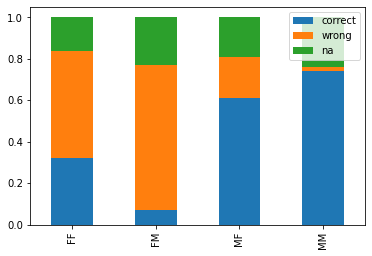

In [308]:

print(ful_res.loc[ful_res['Language']=='ca'])
l='ca'
correct = list(ful_res.loc[ful_res['Language']==l]['%Correct'].astype(float))
print(correct)
wrong = list(ful_res.loc[ful_res['Language']==l]['%Wrong'].astype(float))
na= list(ful_res.loc[ful_res['Language']==l]['%N/A'])
index = ['FF', 'FM', 'MF', 'MM']
df = pd.DataFrame({'correct': correct,
                    'wrong': wrong, 'na':na}, index=index)
ax = df.plot.bar(stacked=True)





[0.32, 0.07, 0.61, 0.74]
[0.52, 0.7, 0.2, 0.02]
    correct  wrong    na
FF     0.32   0.52  0.16
FM     0.07   0.70  0.23
MF     0.61   0.20  0.19
MM     0.74   0.02  0.24
[0.37, 0.1, 0.63, 0.77]
[0.49, 0.71, 0.22, 0.03]
    correct  wrong    na
FF     0.37   0.49  0.14
FM     0.10   0.71  0.19
MF     0.63   0.22  0.15
MM     0.77   0.03  0.20
[0.35, 0.05, 0.73, 0.92]
[0.63, 0.92, 0.23, 0.04]
    correct  wrong    na
FF     0.35   0.63  0.02
FM     0.05   0.92  0.03
MF     0.73   0.23  0.03
MM     0.92   0.04  0.04
[0.31, 0.11, 0.74, 0.89]
[0.67, 0.85, 0.23, 0.06]
    correct  wrong    na
FF     0.31   0.67  0.01
FM     0.11   0.85  0.04
MF     0.74   0.23  0.03
MM     0.89   0.06  0.05
[0.78, 0.55, 0.24, 0.4]
[0.19, 0.34, 0.69, 0.48]
    correct  wrong    na
FF     0.78   0.19  0.03
FM     0.55   0.34  0.11
MF     0.24   0.69  0.07
MM     0.40   0.48  0.12
[0.45, 0.15, 0.75, 0.91]
[0.55, 0.83, 0.23, 0.06]
    correct  wrong    na
FF     0.45   0.55  0.00
FM     0.15   0.83  0.02
MF  

IndexError: index 19 is out of bounds for axis 0 with size 19

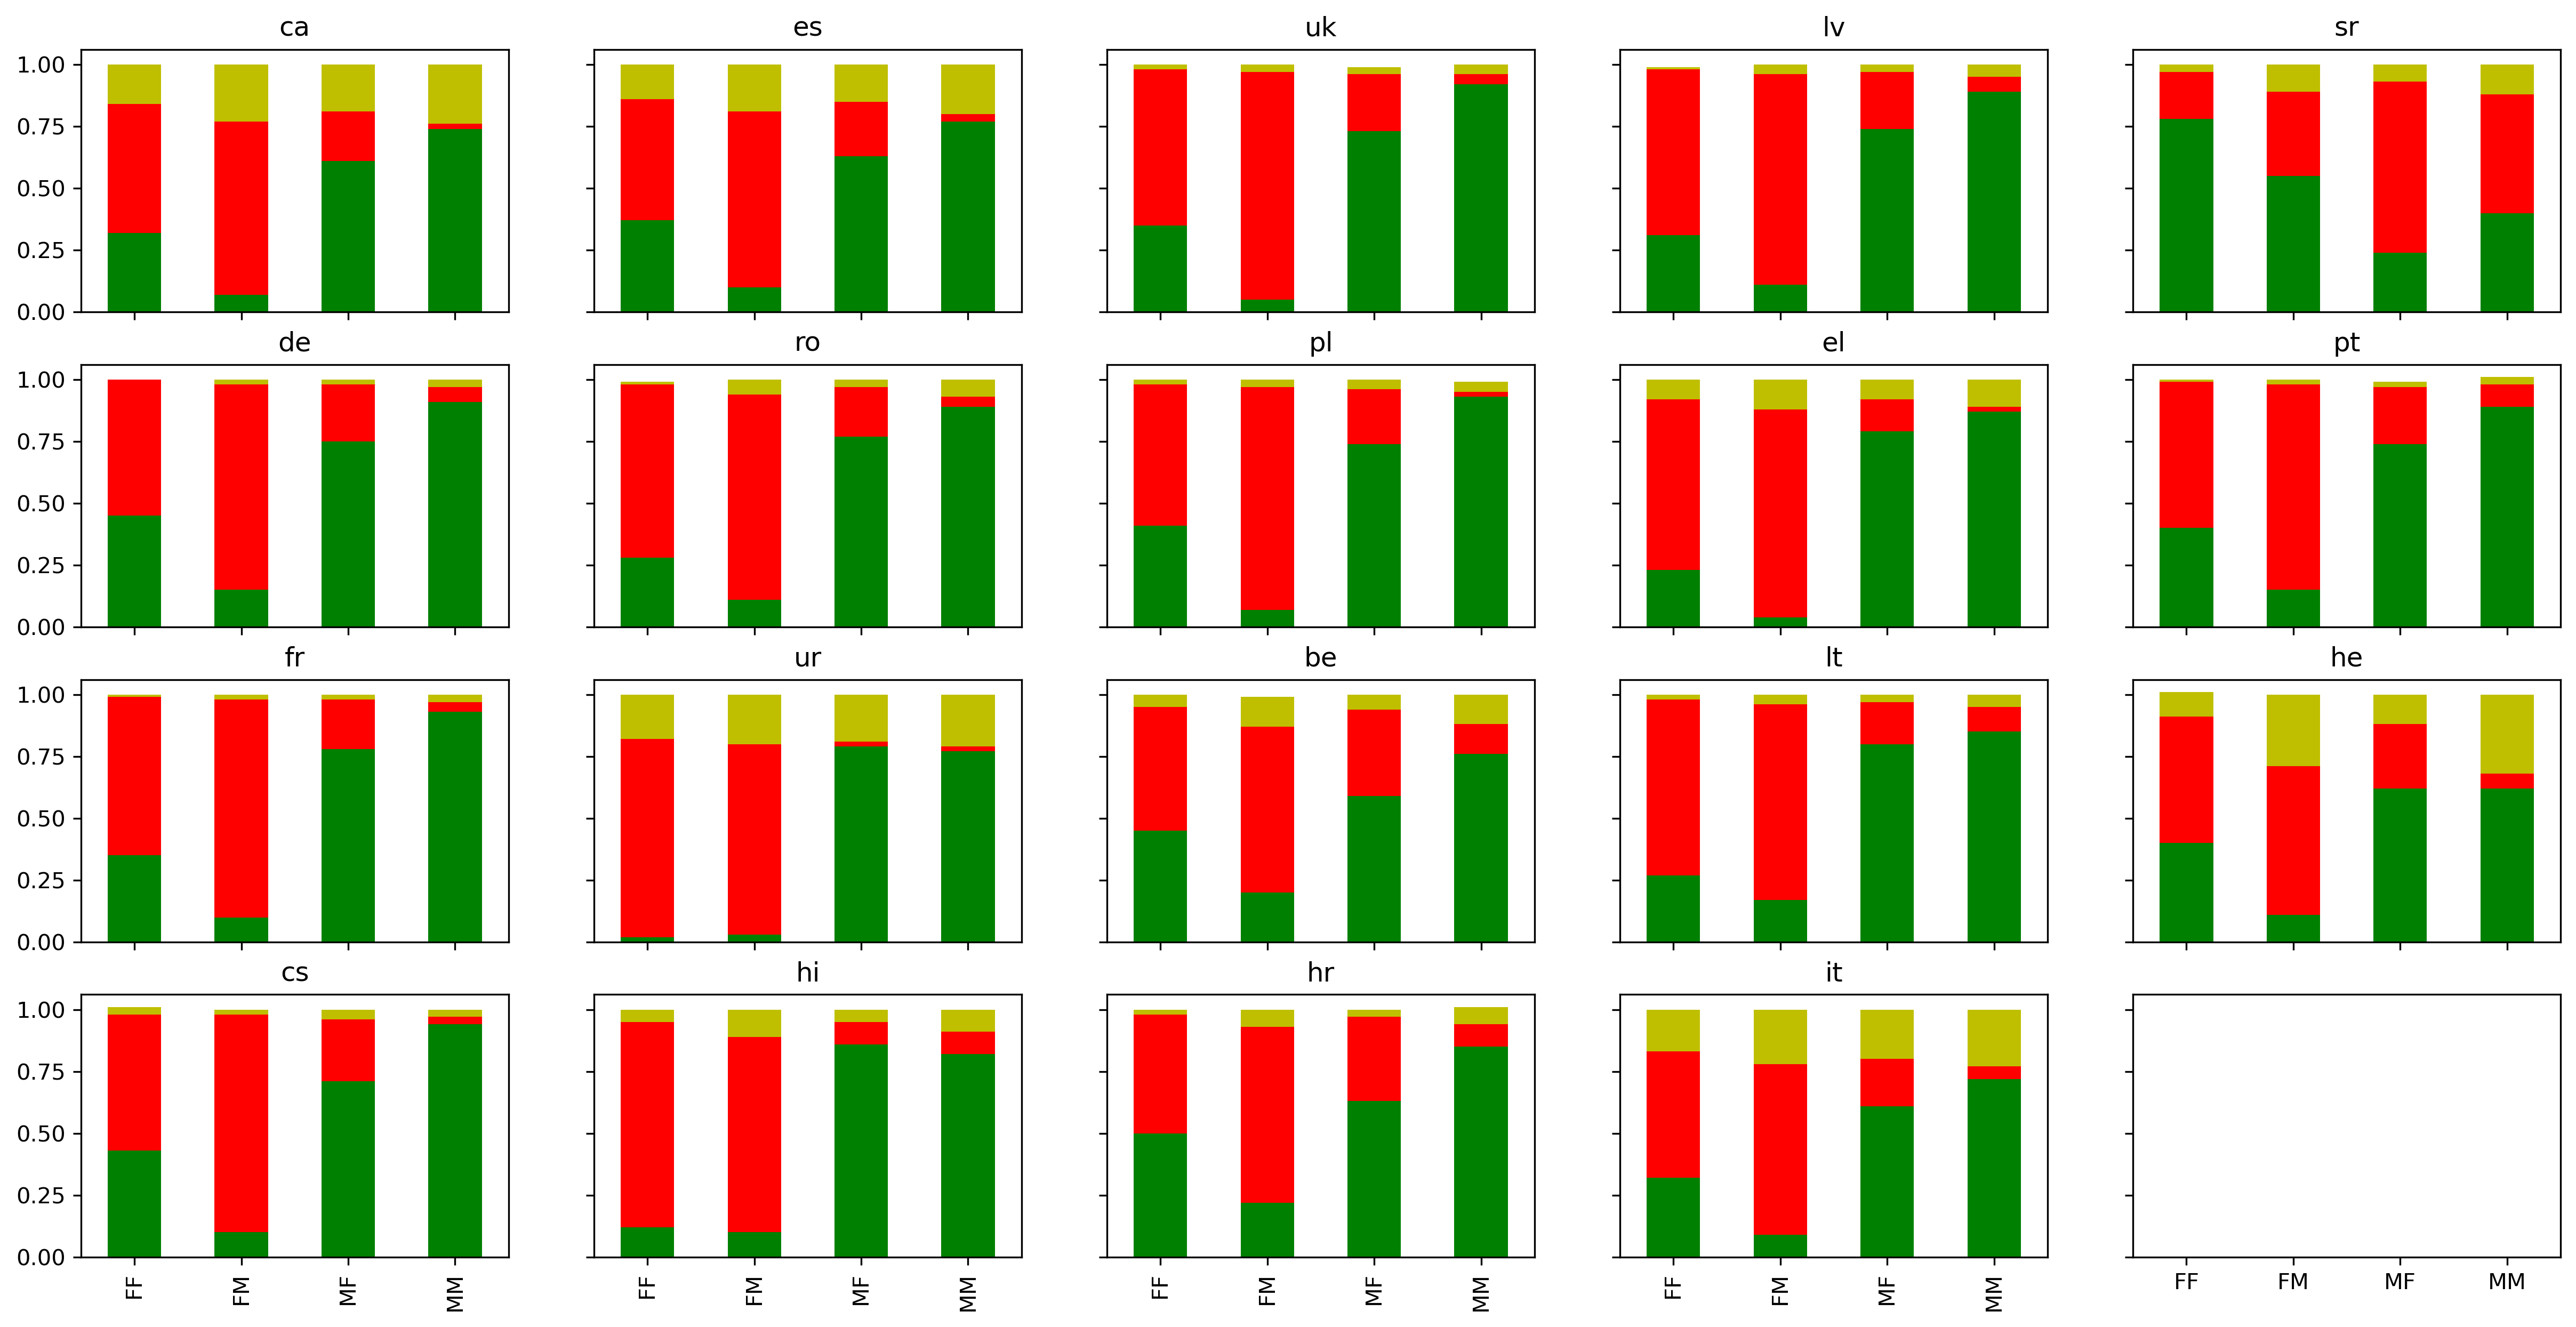

In [310]:
## plotting 25 languages for m2m

fig, ax = plt.subplots(nrows=4, ncols=5, sharey=True, sharex=True, figsize=(20,10), dpi=300)

ful_res = ful_res[ful_res['Language'] != 'ar']
ful_res = ful_res[ful_res['Language'] != 'no']

increment=0
colors=['g','r','y']
hatches=['.','o','/']
for row in ax:
    for col in row:
        print(ful_res['Language'].unique()[increment])
        correct = list(ful_res.loc[ful_res['Language']==ful_res['Language'].unique()[increment]]['%Correct'].astype(float))
        print(correct)
        wrong = list(ful_res.loc[ful_res['Language']==ful_res['Language'].unique()[increment]]['%Wrong'].astype(float))
        print(wrong)
        na= list(ful_res.loc[ful_res['Language']==ful_res['Language'].unique()[increment]]['%N/A'])
        index = ['FF', 'FM', 'MF', 'MM']
        df = pd.DataFrame({'correct': correct,
                            'wrong': wrong, 'na':na}, index=index)
        df.plot(ax=col, kind='bar', stacked=True, title='{}'.format(ful_res['Language'].unique()[increment]), legend=None,  color=colors, )
        print(df)
        increment+=1
        
fig.tight_layout()
plt.savefig('m2m_100_1.2B_CLUE_OCC.pdf', dpi=300)
plt.show()
